In [1]:
#Import libraries
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read csv files to create df's
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [3]:
#Check df 'hypotheses'
hypotheses.info()
print(hypotheses.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1     

In [4]:
#Change column names to lowercase
hypotheses.columns = ['hypotheses', 'reach', 'impact', 'confidence', 'effort']
#Revisar si el cambio funcionó
print(hypotheses.head(5))

                                          hypotheses  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   confidence  effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


In [5]:
#ICE framework calculation
hypotheses['ice'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort'] 
ICE = hypotheses[['hypotheses', 'ice']].sort_values(by = 'ice', ascending = False)
print(ICE)

                                          hypotheses        ice
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [6]:
#RICE framework calculation
hypotheses['rice'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
RICE = hypotheses[['hypotheses', 'rice']].sort_values(by = 'rice', ascending = False)
print(RICE)

                                          hypotheses   rice
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Applying the ICE and RICE frameworks to hypotheses creates a difference in their relevance. Firstly, the ICE framework ranked them in a certain order of relevance, while the RICE framework ranked them in a different order. This is due to the parameters used in both frameworks. ICE can only provide a snapshot of their business importance. However, the RICE framework considers the reach of the hypotheses, giving a more realistic picture of the impact of each of them. Therefore, I believe it is best to focus efforts on testing the hypotheses at the top of the RICE framework. It should also be noted that the most important and those that require the most attention are probably hypotheses 0 and 6. Hypothesis 6 did not change its position when applying the RICE framework, and hypothesis 0 only dropped one place in relevance when applying the RICE framework.

In [7]:
#Check df 'orders'
orders.info()
print(orders.head(5))
#Check for duplicates
print('Duplicates:', orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B
Valores duplicados: 0


In [8]:
#Group users by groups
groups_per_user = orders.groupby('visitorId')['group'].nunique()

#Search for users in both groups
users_in_both = groups_per_user[groups_per_user > 1].index

#Show 'user_id' of users who are in both groups
print(users_in_both)

Int64Index([   8300375,  199603092,  232979603,  237748145,  276558944,
             351125977,  393266494,  457167155,  471551937,  477780734,
             818047933,  963407295, 1230306981, 1294878855, 1316129916,
            1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
            1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
            2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
            2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
            2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
            3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
            3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
            3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
            4186807279, 4256040402, 4266935830],
           dtype='int64', name='visitorId')


In [9]:
#Double check for users who are in both groups
print(orders[orders['visitorId'].isin(users_in_both)].sort_values(by = 'visitorId'))

     transactionId   visitorId        date  revenue group
703     4293855558     8300375  2019-08-07     30.5     A
71      3679129301     8300375  2019-08-01    165.7     B
823     2971973105   199603092  2019-08-27     45.9     A
246      437656952   199603092  2019-08-02     55.7     B
26      2223239646   199603092  2019-08-15     55.7     A
..             ...         ...         ...      ...   ...
187     2048878902  4256040402  2019-08-17     25.8     A
114     1120327437  4256040402  2019-08-01     90.2     A
60      1421016313  4256040402  2019-08-16    875.5     B
662     1811671147  4266935830  2019-08-29   1220.2     A
682     1216533772  4266935830  2019-08-29   1220.2     B

[181 rows x 5 columns]


In [10]:
#Delete data from users who are in both groups
orders = orders[~orders['visitorId'].isin(users_in_both)].reset_index()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1016 non-null   int64  
 1   transactionId  1016 non-null   int64  
 2   visitorId      1016 non-null   int64  
 3   date           1016 non-null   object 
 4   revenue        1016 non-null   float64
 5   group          1016 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 47.8+ KB


I consider it important to remove users who belonged to both test groups, since this could have been due to a failure in traffic division, which could alter the results of the A/B test and therefore not be significant.

In [11]:
#Change dtype to datetime in 'date'
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          1016 non-null   int64         
 1   transactionId  1016 non-null   int64         
 2   visitorId      1016 non-null   int64         
 3   date           1016 non-null   datetime64[ns]
 4   revenue        1016 non-null   float64       
 5   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 47.8+ KB


In [12]:
#Check df 'visits'
visits.info()
print(visits.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756


In [13]:
#Delete duplicates for 'orders' in 'date' and 'group'
dates_groups = orders[['date', 'group']].drop_duplicates()

#Find cumulative value of orders
cumulative_revenue = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique, 'revenue': 'sum'}), 
    axis = 1).sort_values(by = ['date', 'group'])

#Change column names
cumulative_revenue.columns = ['date', 'group', 'transactions', 'visitors', 'revenue']

#Check changes
print(cumulative_revenue.head(5))

          date group  transactions  visitors  revenue
45  2019-08-01     A            23        19   2266.6
54  2019-08-01     B            17        17    967.2
149 2019-08-02     A            42        36   3734.9
147 2019-08-02     B            40        39   3535.3
245 2019-08-03     A            66        60   5550.1


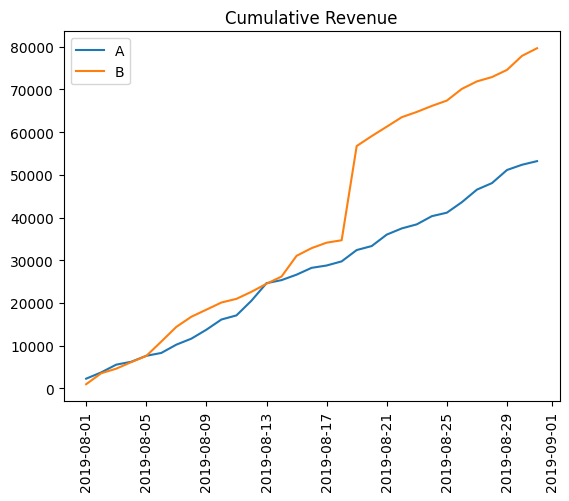

In [14]:
#Separate cumulative values by group
cumulative_revenue_a = cumulative_revenue[cumulative_revenue['group'] == 'A']
cumulative_revenue_b = cumulative_revenue[cumulative_revenue['group'] == 'B']

#Plot cumulated revenue by group
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label = 'A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label = 'B')
plt.title('Cumulative Revenue')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In terms of revenue, it seems that group B has had a higher accumulated value throughout the trial than group A. A peak in revenue can be observed that occurred between August 17 and 21, thus improving this metric for group B. If you look closely, it seems that the trend after this peak is similar to the one obtained before it, so it would be necessary to study what happened in that period and why the revenue increased so much.

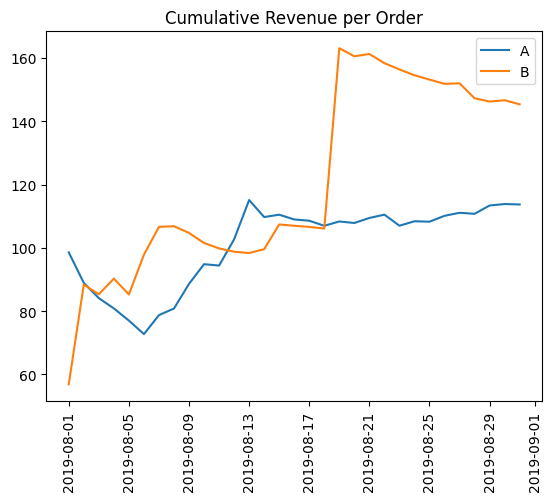

In [15]:
#Plot cumulated conversion by group
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'] / cumulative_revenue_a['transactions'], label = 'A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'] / cumulative_revenue_b['transactions'], label = 'B')
plt.title('Cumulative Revenue per Order')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

As in the previous graph, Group B appears to be ahead in terms of order size. The same peak is observed between August 17 and 21, suggesting that this period saw very large, possibly atypical, orders. However, it can be observed that after this period, order size declines, but remains larger than Group A.

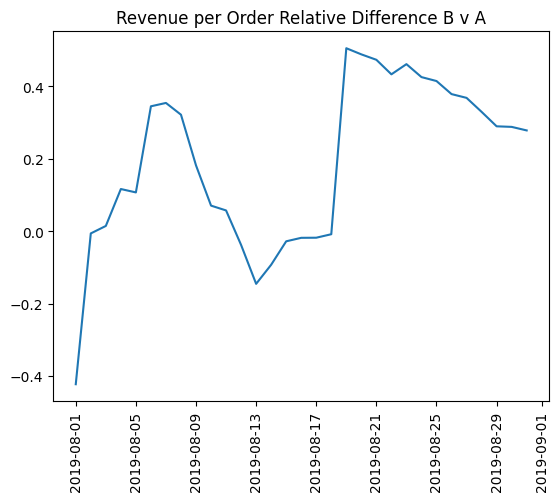

In [16]:
#Combine the accumulated information to obtain information separated by group by column
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

#Plot relative difference in average revenue per order of group B compared to group A 
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['transactionsB']) / (merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['transactionsA']) - 1)
plt.title('Revenue per Order Relative Difference B v A')
plt.xticks(rotation = 90)
plt.show()

The relative difference graph of group B with respect to A shows that it remained superior to group A for most of the test. However, it should be noted that prior to the peak around August 18, group B was declining, being overtaken by group A and was recovering weakly, barely reaching the same performance as group A around August 17, with this peak, possibly atypical, being what made it take the lead for the remainder of the test. Therefore, a conclusion cannot yet be drawn; information is lacking about what happened on August 18, whether there was some intervention or if the peak was truly organic.

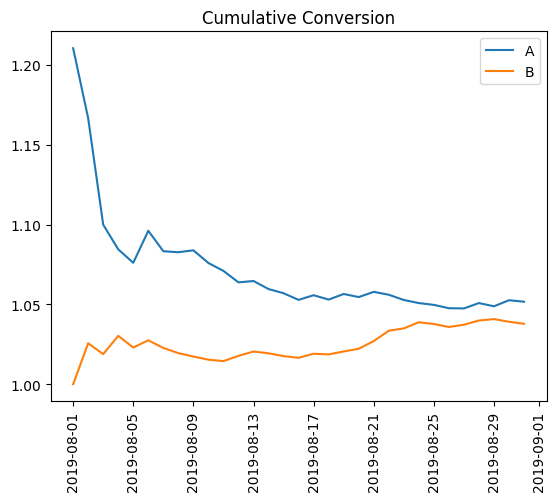

In [17]:
#Calculate cumulative conversion by group
merged_cumulative_revenue['conversionA'] = merged_cumulative_revenue['transactionsA'] / merged_cumulative_revenue['visitorsA']
merged_cumulative_revenue['conversionB'] = merged_cumulative_revenue['transactionsB'] / merged_cumulative_revenue['visitorsB']

#Plot cumulative conversion by group
plt.plot(merged_cumulative_revenue['date'], merged_cumulative_revenue['conversionA'], label = 'A')
plt.plot(merged_cumulative_revenue['date'], merged_cumulative_revenue['conversionB'], label = 'B')
plt.title('Cumulative Conversion')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

The cumulative conversion graph shows something very different from what was observed in the previous graphs. Group A shows a steep drop in the first days of the test, then stabilizes downward around 1.05 conversion. Group B, on the other hand, slowly increases its cumulative conversion, reaching relatively the same range as Group A. Therefore, it could be said that there is no difference between the two groups. However, statistical tests must still be performed, and outliers must be determined and eliminated to be completely certain.

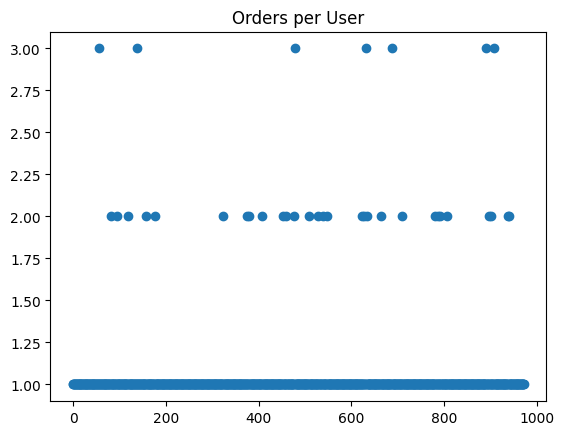

In [18]:
#Find orders per user
orders_by_user = orders.groupby('visitorId', as_index = False).agg({'transactionId': pd.Series.nunique})
orders_by_user.columns = ['users', 'orders']

#Define x range for plot
x_values_orders = pd.Series(range(0, len(orders_by_user)))

#Scatter plot orders per user
plt.scatter(x_values_orders, orders_by_user['orders'])
plt.title('Orders per User')
plt.show()

In [19]:
#Find orders per user 95/99 percentiles
print('Percentiles 95/99:', np.percentile(orders_by_user['orders'], [95, 99]))

Percentiles 95/99: [1. 2.]


The scatter plot of orders per user shows that the vast majority of users place only one order, a few place two, and only a few place three. Therefore, by calculating the 95th (1) and 99th (2) percentiles, it can be determined that users who place more than two orders can be considered atypical.

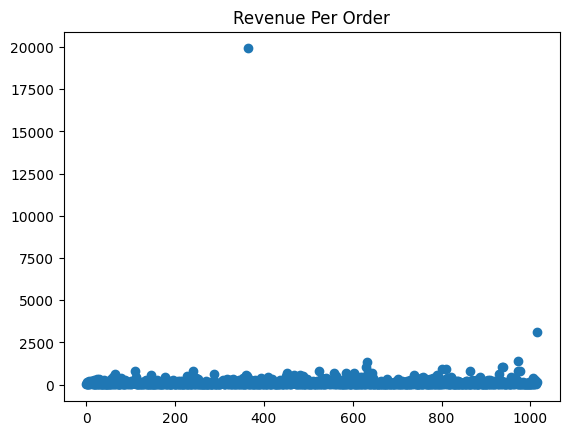

In [20]:
#Define x range for plot in revenue
x_values_prices = pd.Series(range(0, len(orders['revenue'])))

#Scatter plot revenue per order
plt.scatter(x_values_prices, orders['revenue'])
plt.title('Revenue Per Order')
plt.show()

In [21]:
#Find revenue per order 95/99 percentiles
print('Percentiles 95/99:', np.percentile(orders['revenue'], [95, 99]))

Percentiles 95/99: [414.275 830.3  ]


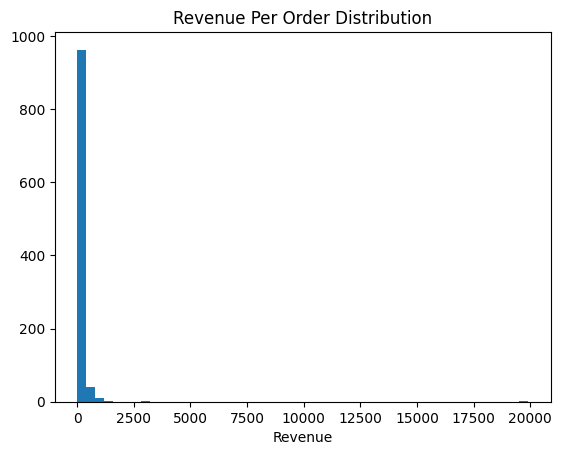

In [33]:
#Histograma complementario
plt.hist(orders['revenue'], bins = 50)
plt.xlabel('Revenue')
plt.title('Revenue Per Order Distribution')
plt.show()

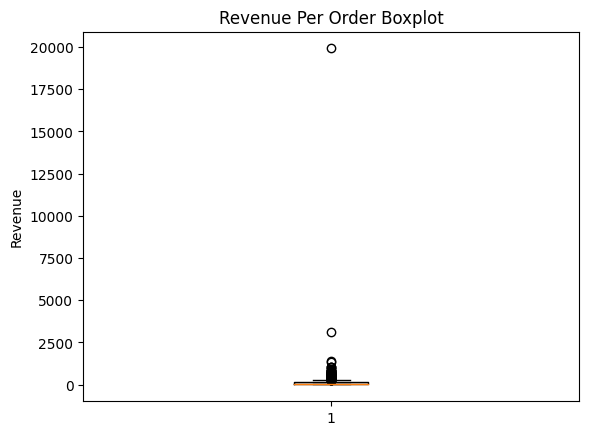

In [34]:
#Boxplot complementario
plt.boxplot(orders['revenue'])
plt.ylabel('Revenue')
plt.title('Revenue Per Order Boxplot')
plt.show()

The order size scatter plot shows that almost all users place orders of up to $2,500. An outlier can be observed: an order of up to $20,000. By obtaining the 95th ($414.27) and 99th ($830.30) percentiles, it can be said that all orders greater than $830.30 are outliers. Similarly, the histogram and box plot confirm the outlier of 20,000, skewing the distribution of order sizes to the right. Therefore, it would be best to run the analysis without considering outliers to protect the integrity of the test.

In [23]:
#Find order per user by group
orders_by_users_a = orders[orders['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId': pd.Series.nunique})
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = orders[orders['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId': pd.Series.nunique})
orders_by_users_b.columns = ['user_id', 'orders']

In [24]:
#Find orders distribution for the Wilcoxon-Mann-Whitney non-parametric test
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)
sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

In [25]:
#Wilcoxon-Mann-Whitney non-parametric test for each group's conversion
alpha = 0.05

#H0: There is no statistical difference between the conversions of groups A and B
#H1: There is statistical difference between the conversions of groups A and B

#Find p value
pvalue = stats.mannwhitneyu(sample_a, sample_b)[1]

#Automatize answer
if pvalue < alpha: 
    print('Reject H0, there is statistical difference between the conversions of groups A and B')
    print('P Value:','{0:.3f}'.format(pvalue))
else:
    print('Accept H0, there is no statistical difference between the conversions of groups A and B')
    print('P Value:','{0:.3f}'.format(pvalue))

Se rechaza H0, hay diferencia estadística entre las conversiones de los grupos A y B
Valor P: 0.011


It seems that there is a statistical difference between the conversions of groups A and B, this test temporarily confirms that group B is positioned as the leader of the test, having a higher conversion than group A. However, it would be necessary to eliminate the outliers and review whether this result changes.

In [26]:
#Wilcoxon-Mann-Whitney non-parametric test for each group's revenue per order
alpha = 0.05

#H0 = There is no statistical difference between the order sizes of groups A and B.
#H1 = There is statistical difference between the order sizes of groups A and B.

#Find p value
pvalue = stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]

#Automatize answer
if pvalue < alpha: 
    print('Reject H0, there is statistical difference between the order sizes of groups A and B')
    print('P Value:','{0:.3f}'.format(pvalue))
else:
    print('Accept H0, there is no statistical difference between the order sizes of groups A and B.')
    print('P Value:','{0:.3f}'.format(pvalue))

Se acepta H0, no existe diferencia estadística entre los tamaños de ordenes de los grupos A y B
Valor P: 0.862


It appears that order sizes remain similar for groups A and B; group B does not represent a higher revenue per purchase size, but rather per conversion. Likewise, outliers would need to be eliminated to see if this result changes.

In [27]:
#Find atypical values in orders per user
atypical_orders_users = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'], orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id']], axis = 0)

#Find atypical values in order size
atypical_revenue_users = orders[orders['revenue'] > 830.3]['visitorId']

#Classify users with atypical values
atypical_users = pd.concat([atypical_orders_users, atypical_revenue_users], axis = 0).drop_duplicates()

#Find how many atypical users exist
print('Atypical users:', atypical_users.shape)

Usuarios atípicos: (16,)


In [28]:
#Delete atypical users from orders' distribution for the Wilcoxon-Mann-Whitney non-parametric test
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(atypical_users))]['orders'], 
                    pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum() 
                    - len(orders_by_users_a['orders'])), name = 'orders')], axis = 0)

sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(atypical_users))]['orders'], 
                    pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum() 
                    - len(orders_by_users_b['orders'])), name = 'orders')], axis = 0)

In [29]:
#Wilcoxon-Mann-Whitney non-parametric test for each groups' conversion without atypical values 
alpha = 0.05

#H0 = There is no statistical difference between the conversions of groups A and B with no outliers.
#H1 = There is statistical difference between the conversions of groups A and B with no outliers.

#Find p values
pvalue = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]

#Automatize answer
if pvalue < alpha: 
    print('Reject H0, there is statistical difference between the conversions of groups A and B with no outliers')
    print('P Value:','{0:.3f}'.format(pvalue))
else:
    print('Accept H0, there is no statistical difference between the conversions of groups A and B with no outliers')
    print('P Value:','{0:.3f}'.format(pvalue))

Se rechaza H0, hay diferencia estadística entre las conversiones de los grupos A y B sin valores atípicos
Valor P: 0.007


Even without outliers, Group B leads the test, even by a larger margin, as the test with outliers had a p-value of 1.1%, and the test without them had a p-value of 0.7%. If there is a difference between the conversions of Groups A and B without considering the outliers, this means that Group B leads the test.

In [30]:
#Wilcoxon-Mann-Whitney non-parametric test for each groups order sizes without outliers
alpha = 0.05

#H0 = There is no statistical difference between the order sizes of groups A and B with no outliers.
#H1 = There is statistical difference between the order sizes of groups A and B with no outliers.

#P Value
pvalue = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(atypical_users)))]['revenue'],
                            orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(atypical_users)))]['revenue']
                           )[1]

#Automatize answer
if pvalue < alpha: 
    print('Reject H0, there is statistical difference between the order sizes of groups A and B with no outliers.')
    print('P Value:','{0:.3f}'.format(pvalue))
else:
    print('Accept H0, there is no statistical difference between the order sizes of groups A and B with no outliers.')
    print('P Value:','{0:.3f}'.format(pvalue))

Se acepta H0, no existe diferencia estadística entre los tamaños de ordenes de los grupos A y B sin valores atípicos
Valor P: 0.822


As in the previous test with outliers, there is no difference between the order sizes for groups A and B.

In general, Group B is positioned as the leader of the test. The increase in revenue is mainly due to increased conversion rather than order size. Therefore, once the leader has been established, the test should be terminated.